In [28]:
import pandas as pd
import os
from pandas import read_csv
import matplotlib as mpl
import matplotlib.pyplot as plt
MYDIR=os.getcwd()
print(MYDIR)

/Users/lilybug


In [29]:
#import dataset
path=MYDIR+"/Downloads/international-airline-passengers.csv"
df=pd.read_csv(path)
#drop empty rows
df=df.dropna()
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [30]:
#Rename Column
df1=df.rename({'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'International airline passengers'}, axis=1)
df1.head()

,Month,International airline passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [32]:
df1['Month']=pd.to_datetime(df1['Month'])
df1.dtypes

Month                               datetime64[ns]
International airline passengers           float64
dtype: object

In [42]:
df_final=df1.set_index('Month')
df_final

,International airline passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [61]:
#divide into train set
train = df1[:int(0.7*(len(df1)))]
train.tail()

,Month,International airline passengers
95,1956-12-01,306.0
96,1957-01-01,315.0
97,1957-02-01,301.0
98,1957-03-01,356.0
99,1957-04-01,348.0


In [62]:
#divide into test set
valid = df1[int(0.7*(len(df1))):]
valid

,Month,International airline passengers
100,1957-05-01,355.0
101,1957-06-01,422.0
102,1957-07-01,465.0
103,1957-08-01,467.0
104,1957-09-01,404.0
105,1957-10-01,347.0
106,1957-11-01,305.0
107,1957-12-01,336.0
108,1958-01-01,340.0
109,1958-02-01,318.0


/Users/lilybug/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


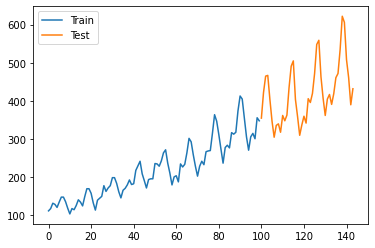

In [63]:
#preprocessing (since arima takes univariate series as input)
train.drop(['Month'],axis=1,inplace=True)
valid.drop(['Month'],axis=1,inplace=True)

#plotting the data
plt.plot(train['International airline passengers'], label='Train')
plt.plot(valid['International airline passengers'], label='Test')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1149.749, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1079.094, Time=0.10 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=1078.190, Time=0.02 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=1079.232, Time=0.10 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=1080.607, Time=0.24 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=1063.641, Time=0.04 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=1062.635, Time=0.11 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=1062.614, Time=0.28 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.93 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=1063.105, Time=0.34 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=1080.572, Time=0.21 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=1060.055, Time=0.33 sec
 ARIMA(3,2,0)(1,1,0)[12]          

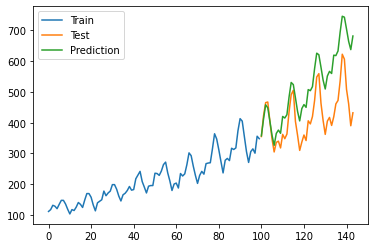

In [69]:
#building the model
from pmdarima import auto_arima
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
model = pm.auto_arima(df_final, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

In [70]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

117.12704290703589


/Users/lilybug/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/lilybug/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Month
1949-01-01      0.000000
1949-02-01    186.661516
1949-03-01    124.013633
1949-04-01    145.993585
1949-05-01    126.006485
1949-06-01    112.998471
1949-07-01    148.995166
1949-08-01    161.001203
1949-09-01    148.003756
1949-10-01    124.002375
dtype: float64


Text(0.5, 1.0, 'Plot showing Prediction, Actual and 14 day Forecast')

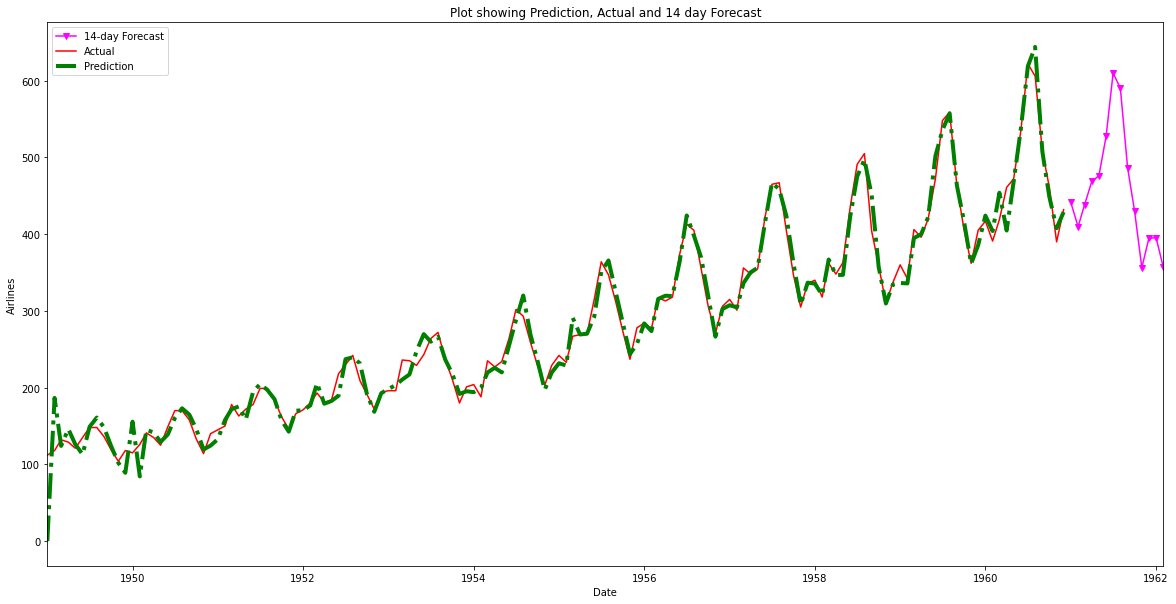

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df_final,order=(3,2,0),seasonal_order=(2, 1, 0, 12))

# Extract fitted model

model_fit=model.fit(disp=False)

# Calculate residuals on original series
prediction=pd.Series(model_fit.fittedvalues, copy=True)

print(prediction.head(10))

# Compute Residuals and check residual plot
residual=prediction-df_final

#plt.figure(figsize=(20,10))
#plt.plot(residual, 'o')


#r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
#data = np.c_[range(1,41), r[1:], q, p]
#table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
#print table.set_index('lag')


# Make 15 day prediction
K=14
forecast=model_fit.forecast(K)

#print(forecast)

# plot forecast results and display RMSE

plt.figure(figsize=(20,10))
plt.plot(forecast, 'fuchsia',label="14-day Forecast",marker="v");
plt.plot(df_final,'r',label="Actual");
plt.plot(prediction,'g',label="Prediction",linestyle="dashdot",linewidth=4);
plt.xlabel("Date")
plt.ylabel("Airlines")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.title("Plot showing Prediction, Actual and 14 day Forecast")